# **<center> Solution Manual For Tutors </center>**

# <center><strong>Important:</strong> Make a Copy of this Google Colab Notebook!
</center>

<p>Please refrain from using or modifying this current Google Colab notebook directly. Instead, follow these instructions to create your own copy:</p>

<ol>
  <li>Go to the "File" menu at the top of the Colab interface.</li>
  <li>Select "Save a copy in Drive" to create a duplicate of this notebook.</li>
  <li>You can now work on your own copy without affecting the original.</li>
</ol>

<p>This ensures that you have a personalized version to work on and make changes according to your needs. Remember to save your progress as you go. Enjoy working on your own copy of the Google Colab notebook!</p>


# **Module 13: Comparison of your own PCA function and Pythons built-in PCA function.**

In this module you compare your own PCA function with the built-in of the python sklearn package.

## **Getting Started**

Run the provided code sections and follow the instructions. Implement your own code were indicated.

## **Importing Python Packages**
The first step is to import your necessary Python packages. <p>
 Check out the built in sklearn packages: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) & [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PC)

In [ ]:
import numpy as np # Importing the numpy library as np - this is a common practice for Python coding
import matplotlib.pyplot as plt # Importing the matplotlib.pyplot as plt - useful for visualizing data
import pandas as pd # libary for data management
import seaborn as sb # library for visualization

## *Copy* your own PCA function from Module 12 here.

In [ ]:
def PCA_custom(X, nComponents):

  # normalize data
  X_centered = X - np.mean(X, axis = 0)
  X_norm = X_centered/np.std(X_centered, axis=0)

  # Calculating the covariance matrix of the mean-centered data.
  cov_mat = np.cov(X_norm, rowvar = False)

  # Calculating Eigenvalues and Eigenvectors of the covariance matrix
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

  # Sorting Eigenvalues and Eigenvectors
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  # Calculate explained variance
  explained_variance = sorted_eigenvalue / np.sum(sorted_eigenvalue)

  # Select a subset of principal components
  eigenvector_subset = sorted_eigenvectors[:,0:nComponents]

  # Transform the data
  X_reduced = np.dot(eigenvector_subset.transpose() , X_norm.transpose() ).transpose()

  return X_reduced, explained_variance

## **Compare your own PCA function with the built-in function using the [IRIS datset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)**

Load the data set.


<Axes: xlabel='sepal length', ylabel='sepal width'>

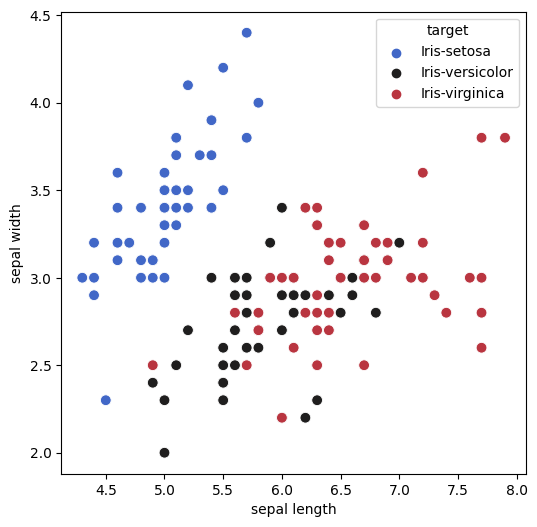

In [ ]:
# Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

# Set the figure size for the plot
plt.figure(figsize=(6, 6))

# Create a scatter plot using seaborn
# - Set the data to data (original dataset)
# - Set the x-axis to 'sepal length' and y-axis to 'sepal width'
# - Use the 'target' variable for coloring different groups
# - Set the marker size to 60
# - Use the 'icefire' color palette for coloring
sb.scatterplot(data=data, x='sepal length', y='sepal width', hue='target', s=60, palette='icefire')


Results of your custom function.



In [ ]:
# Prepare the data
x = data.iloc[:, 0:4]  # Select the features (sepal length, sepal width, petal length, petal width)

# Prepare the target
target = data.iloc[:, 4]  # Select the target variable (iris species)

# Applying Principal Component Analysis (PCA)
[mat_reduced, exp_variance ]=PCA_custom(x, 4)  # Your custom function

# Creating a Pandas DataFrame of the reduced dataset
principal_df = pd.DataFrame(mat_reduced, columns=['PC1', 'PC2', 'PC3', 'PC4'])  # Create a DataFrame with the reduced components

# Concatenate the reduced components with the target variable to create a complete dataset
principal_df = pd.concat([principal_df, pd.DataFrame(target)], axis=1)  # Concatenate the reduced components and target variable

# Print explained variance ratios
for i, exp_var in enumerate(exp_variance):
    print(f"Explained Variance for PC{i+1}: {exp_var*100:.2f}%")

Explained Variance for PC1: 72.77%
Explained Variance for PC2: 23.03%
Explained Variance for PC3: 3.68%
Explained Variance for PC4: 0.52%


Let's visualize the results. <p>

Size of the original data: (150, 4)
Size of the dimensionality reduced data: (150, 4)


Text(0, 0.5, 'PC2: 23.03%')

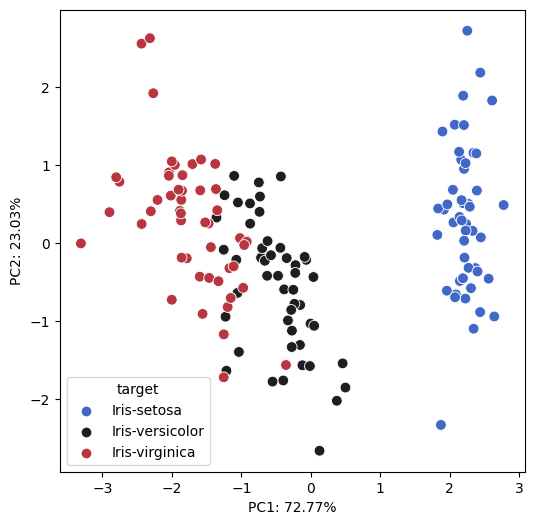

In [ ]:
# Check the size of the data
print("Size of the original data: %s\nSize of the dimensionality reduced data: %s" % (x.shape, mat_reduced.shape))

# Set the figure size for the plot
plt.figure(figsize=(6, 6))

# Create a scatter plot using seaborn - not we only display the first 2 PCs
sb.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', s=60, palette='icefire')

plt.xlabel(f'PC1: {exp_variance[0]*100:.2f}%')
plt.ylabel(f'PC2: {exp_variance[1]*100:.2f}%')

Now let's use the built-in function from the sklearn package to perform PCA. <p>

<strong>Tasks:</strong>
<ol><li>Run the code below to perform PCA on normalized data (zero mean, unit variance). Does the result differ between your custom code and the built-in function? Why or why not?</li>
<li>Look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">documentation</a> and check out parameters you can use.</li>
<li>Look at the <a href="https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/decomposition/_pca.py#L118">source code</a>. This might be intimidating if you haven't looked at source code before. However, this is good practice as it allows you to see how PCA was implemented. Take notes on the differences between your custom function and the sklearn built-in function.</li>
<li>Look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale">documentation</a> and <a href="https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/preprocessing/_data.py#L123">source code</a> of the normalization step using sklearn. Does this differ from the normalization you did?</li>
</ol>

<i> Note: </i> Take your time when looking at the documentation and source code. The main idea of this module is to built familarity with the sklearn package and reading python docucumentation and source code. Feel free to play around by changing parameters and explore how this effects your results.

<strong> Answers: </strong>
<ul> <li> SVD instead of Eigendecomposotion
<li> many custom paramaters
<li> switch of sign for first PC. </ul>

<strong> Explanation for Eigendecomposition vs SVD </strong><p>
Eigendecomposition and Singular Value Decomposition (SVD) are two different techniques used in linear algebra, and both can be applied in Principal Component Analysis (PCA).

Eigendecomposition is used to decompose a square matrix (for example, the covariance or correlation matrix in PCA) into a set of eigenvectors and eigenvalues, which are then used to transform the original data.

SVD, on the other hand, can decompose any (m x n) matrix into singular vectors and singular values. This makes it more flexible than eigendecomposition, which only works with square matrices.

Here are some considerations about choosing between them:

<ol> <li> Numerical Stability: SVD is generally more stable numerically. In certain cases, computing the covariance matrix and then doing an eigendecomposition can amplify the errors due to floating point number precision. SVD does not require the computation of the covariance matrix, and so can avoid this potential issue.

<li> Speed: Eigendecomposition can be faster when the number of variables is small compared to the number of observations. However, with a large number of variables, SVD might be faster and more memory efficient because it does not require the computation of the covariance matrix.

<li> Missing Data: SVD can be applied to data with missing values, whereas eigendecomposition requires a complete data matrix.

<li> Data Transformation: SVD does not require the data to be transformed into a covariance or correlation matrix, unlike the eigendecomposition. </ol>

In practice, modern PCA implementations (like in scikit-learn) usually use SVD because of its numerical stability and flexibility. However, both techniques provide the same result when used in PCA, assuming the data is properly prepared (centered and, optionally, standardized) and the computations are performed without numerical errors.

<strong> Explanation for switched sign </strong><p>
The sign of a principal component (PC) can change depending on the algorithm or software that's used for Principal Component Analysis (PCA), but it doesn't affect the PCA's interpretation.

PCA finds a new set of axes (principal components) onto which to project the data. Each principal component is a linear combination of the original variables. The sign change happens because the direction of the eigenvector (principal component) is not uniquely defined: both an eigenvector and its negative have the same eigenvalue, and hence describe the same principal component.

The first principal component is the direction in the data space along which the projections of the data points (the "scores") have the maximum variance. The second principal component is the direction which is orthogonal (perpendicular in Euclidean space) to the first one and has the maximum variance, and so on. The signs of the components themselves do not affect these variances.

In simple words, if you get a PC with a certain sign (say positive), the opposite sign (negative in this case) is also a valid PC. This is because both the PC and its negative represent the same axis of maximal variance, but in opposite directions. It's like measuring height in either up-to-down or down-to-up direction. The direction doesn't matter for PCA, only the variance along that axis matters.

So, the sign of the PC itself doesn't carry any meaning and can be safely ignored during interpretation.









In [ ]:
# built-ins for PCA
from sklearn.decomposition import PCA # PCA built-in from sklearn
from sklearn.preprocessing import scale # normalizing built-in sklear

x_norm = scale(x, axis = 0); #zero mean, unit variance

print("Data Mean and Variance before normalizing: ", np.mean(x, axis = 0), np.var(x, axis = 0), "\nData Mean and Variance after normalizing: ", np.mean(x_norm, axis = 0), np.var(x_norm, axis = 0), "\n")

pca = PCA(n_components=4) #select the number of components for your model

principalComponents = pca.fit_transform(x_norm)

principal_df2 = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])

principal_df2 = pd.concat([principal_df2, pd.DataFrame(target)], axis = 1)

# Print explained variance ratios
for i, exp_var in enumerate(pca.explained_variance_ratio_):
    print(f"Explained Variance for PC{i+1}: {exp_var*100:.2f}%")


Data Mean and Variance before normalizing:  sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64 sepal length    0.681122
sepal width     0.186751
petal length    3.092425
petal width     0.578532
dtype: float64 
Data Mean and Variance after normalizing:  [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16] [1. 1. 1. 1.] 

Explained Variance for PC1: 72.77%
Explained Variance for PC2: 23.03%
Explained Variance for PC3: 3.68%
Explained Variance for PC4: 0.52%


Let's visualize the results. <p>

Size of the original data: (150, 4)
Size of the dimensionality reduced data: (150, 4)


Text(0, 0.5, 'PC2: 23.03%')

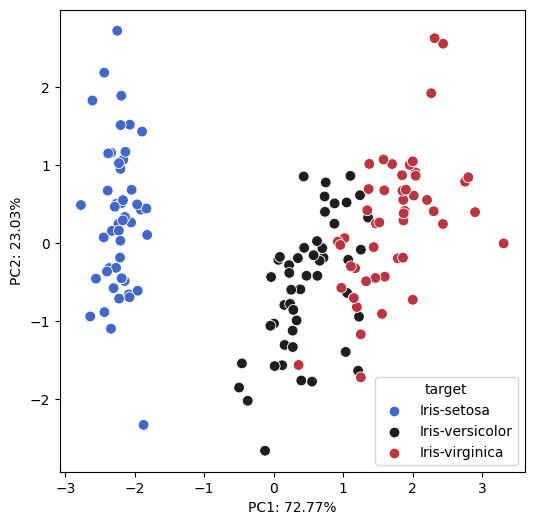

In [ ]:
# Check the size of the data
print("Size of the original data: %s\nSize of the dimensionality reduced data: %s" % (x_norm.shape, mat_reduced.shape))

# Set the figure size for the plot
plt.figure(figsize=(6, 6))

# Create a scatter plot using seaborn - not we only display the first 2 PCs
sb.scatterplot(data=principal_df2, x='PC1', y='PC2', hue='target', s=60, palette='icefire')

plt.xlabel(f'PC1: {pca.explained_variance_ratio_[0]*100:.2f}%')
plt.ylabel(f'PC2: {pca.explained_variance_ratio_[1]*100:.2f}%')

Let's inspect the data tables of the Principal Components. <p>
For your custom PCA code:

In [ ]:
principal_df

,PC1,PC2,PC3,PC4,target
0,2.264542,0.505704,0.121943,0.023073,Iris-setosa
1,2.086426,-0.655405,0.227251,0.103208,Iris-setosa
2,2.367950,-0.318477,-0.051480,0.027825,Iris-setosa
3,2.304197,-0.575368,-0.098860,-0.066311,Iris-setosa
4,2.388777,0.674767,-0.021428,-0.037397,Iris-setosa
...,...,...,...,...,...
145,-1.870522,0.382822,-0.254532,0.388890,Iris-virginica
146,-1.558492,-0.905314,0.025382,0.221322,Iris-virginica
147,-1.520845,0.266795,-0.179277,0.118903,Iris-virginica
148,-1.376391,1.016362,-0.931405,0.024146,Iris-virginica


For the built in sklearn PCA function.

In [ ]:
principal_df2

,PC1,PC2,PC3,PC4,target
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa
...,...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890,Iris-virginica
146,1.558492,-0.905314,-0.025382,-0.221322,Iris-virginica
147,1.520845,0.266795,0.179277,-0.118903,Iris-virginica
148,1.376391,1.016362,0.931405,-0.024146,Iris-virginica


## <center> Module 13 aimed to enhance your understanding of Principal Component Analysis (PCA) using the scikit-learn (sklearn) toolbox. Additionally, it focused on developing your skills in exploring the sklearn documentation and source code to gain deeper insights into the implementation details of PCA. Although looking at source code can be overwhelming initially, it is a beneficial practice as it helps you understand differences between algorithms and improves your coding skills. </center>


## **[OPTIONAL] Apply the sklearn PCA Function on Your Own Dataset**

<strong>Task</strong>: Start by visualizing the data from your chosen dataset. Then, implement PCA using the sklearn package. Experiment with different choices for the number of principal components to use for dimensionality reduction. Justify your selection of the number of principal components and observe how it impacts your results. Finally, visualize your results.

### Finding your own dataset
Use the built-in datasets offered by scikit-learn to develop your own question to analyze using support vector machines. Follow the code below to learn how to import these datasets and display descriptive information to choose your favorite dataset. Use this time to get creative!

In [ ]:
from sklearn import datasets

# List the available datasets:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [ ]:
# Output a discription of the dataset
print(datasets.load_digits().DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## **Apply PCA on your Dataset**
Let's start by loading your dataset and visualizing the data before performing dimensionality reduction. You can follow the steps provided in Part 3 of the instructions. However, keep in mind that there are various ways to visualize data, so feel free to explore different techniques and choose the approach that best suits your needs. This flexibility allows you to showcase the characteristics and patterns of your dataset effectively. Once you have visualized the data, you will gain insights into its structure and distribution, which will serve as a reference for comparison after dimensionality reduction.

In [ ]:
# Visualization of the data set

############ Insert you rown code here ############

Perform PCA on your own data set using the sklearn PCA function.

In [ ]:
# Data Prperation

############ Insert you rown code here ############

# PCA

############ Insert you rown code here ############

Visualize your dimensionality reduced data. Compare your results to the initial dataset.

In [ ]:
# Visualization of the dimensionality reduced data

############ Insert you rown code here ############

### <center> You are an absolute Pro - well done! </center>